In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = np.loadtxt("/content/drive/MyDrive/Code/800.txt")

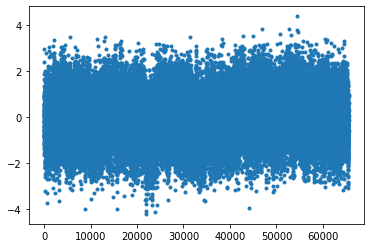

In [5]:
x = data[:, 0]
y = data[:, 1]
plt.plot(x, y, ".");

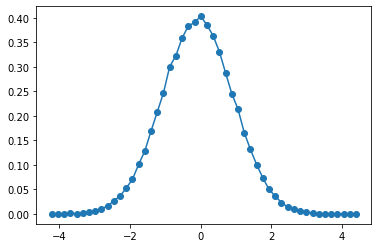

In [6]:
data = y
bins = 50
min = data.min()
max = data.max()

dx = (max - min) / ( bins - 1)
A = np.zeros(bins)

z = data - min
for i in range(len(data)) :
  k = int(z[i]/dx)
  A[k] += 1
A = A / (np.sum(A) * dx)

X = np.linspace(min ,max, bins)

plt.plot(X, A, "-o");

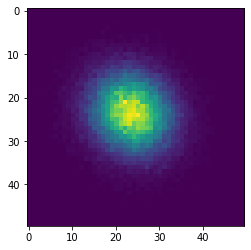

In [7]:
tau = 20
m = np.zeros((bins, bins))

data_new = data - min

for i in range(len(data) - tau):
  a = int(data_new[i] / dx)
  b = int(data_new[i+tau] / dx)
  m[a][b] += 1
m = m/np.sum(m)*dx**2
plt.imshow(m);

In [10]:
T = [i for i in range(1, 50)]
D = []

# data = y
bins = 100
min = data.min()
max = data.max()
dx = (max - min) / ( bins - 1)
data = data - min
for i in T :
  
  M = np.zeros((bins, bins))
  m_x = np.zeros(bins)
  m_y = np.zeros(bins)

  for i in range(len(data) - tau):
    h1 = int(data[i] / dx)
    h2 = int(data[i+tau] / dx)

    m_x[h1] += 1
    m_y[h2] += 1
    M[h2][h1] += 1
  m_x = m_x/(np.sum(m_x)*dx)
  m_y = m_y/(np.sum(m_y)*dx)
  M = M/(np.sum(M)*dx**2)


  d = 0  
  for i in range(bins):
    for j in range(bins):
      d += np.abs(M[i][j] - m_x[i]*m_y[j]) * (dx**2)
  D.append(d)

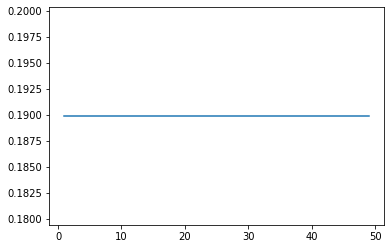

In [11]:
plt.plot(T, D);